In [2]:
# TMI Data distribution analysis

import os
import sys
path_cur = os.path.abspath('.')
sys.path.append(path_cur)
from os.path import dirname as up

import pandas as pd
import geopandas as gpd


In [3]:
# tmi_path = os.path.join(up(path_cur), 'data', 'TMI_2011_2019', 'VA_TMI_2011_2019.shp')

# tmi_df = gpd.read_file(tmi_path)
# tmi_df['area'] = tmi_df['geometry'].area
# tmi_df = tmi_df.to_crs(4326)

# tmi_df['unique_id'] = range(1, len(tmi_df)+1)
# tim_df.to_file(os.path.join(up(path_cur), 'data', 'TMI_2011_2019', 'VA_TMI_2011_2019_wgs84_uniqueid.shp'))

In [4]:
tmi_path = os.path.join(up(path_cur), 'data', 'TMI_2011_2019', 'VA_TMI_2011_2019_wgs84_uniqueid.shp')

In [7]:
tmi_df = gpd.read_file(tmi_path)

In [8]:

def image_year(x):
    
    years = [2009, 2011, 2013, 2017]
    
    final_year = '2009'
    for year in years:
        if str(year) in x and int(year) > int(final_year):
            final_year = year
    
    return final_year

tmi_df['year'] = tmi_df['RefImagery'].apply(lambda x: image_year(x))

<AxesSubplot:>

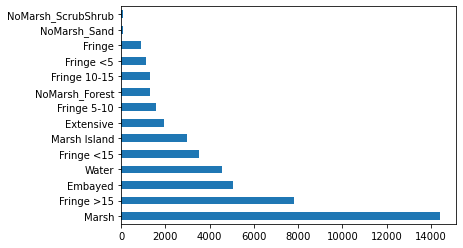

In [9]:
tmi_df['MarshType'].value_counts().plot(kind='barh')

<AxesSubplot:>

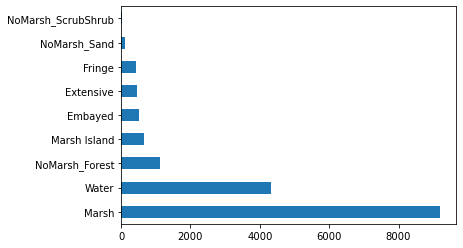

In [10]:
years = ['2016', '2017', '2018', '2019']

tmi_df[tmi_df['PubYear'].isin(years)]['MarshType'].value_counts().plot(kind='barh')

<AxesSubplot:>

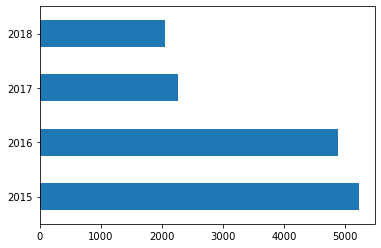

In [11]:
tmi_df[tmi_df['MarshType']=='Marsh']['PubYear'].value_counts().plot(kind='barh')

<AxesSubplot:>

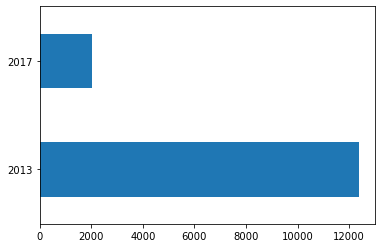

In [12]:
tmi_df[tmi_df['MarshType']=='Marsh']['year'].value_counts().plot(kind='barh')

In [14]:
# Filter ploygons that only have marsh types, and the area of the marshes > 50

no_marsh_types = ['NoMarsh_Forest', 'NoMarsh_Sand', 'NoMarsh_ScrubShrub', 'Water']
marsh_df = tmi_df[(~tmi_df['MarshType'].isin(no_marsh_types)) & (tmi_df['area']>500)]

# marsh_df.to_file(os.path.join(up(path_cur), 'data', 'processing_data', 'marsh_all_500.geojson'), driver='GeoJSON')

In [15]:
marsh_df

,MarshType,CmtyType,Reedgrass,PrcntPhrag,FieldDate,CommunType,Dominant_P,COUNTY,PubYear,Acres,...,Shape_Leng,PrevPubYr,Shape_Le_1,Shape_Area,Comments,RefImagery,area,unique_id,geometry,year
0,Fringe >15,None,None,None,None,None,None,Northumberland,2014,2.577337,...,671.157404,None,671.157404,10430.113424,None,VBMP 2011 and 2013 imagery,10430.113424,1,"POLYGON ((-76.59780 38.00282, -76.59782 38.002...",2013
1,Fringe >15,CAT,None,None,2014-06-23,Type VI ? Cattail,Typha spp,Northumberland,2014,0.590529,...,361.560555,None,361.560555,2389.787806,None,VBMP 2011 and 2013 imagery,2389.787806,2,"POLYGON ((-76.59674 38.00297, -76.59676 38.002...",2013
2,Fringe >15,None,None,None,None,None,None,Northumberland,2014,0.452015,...,246.204222,None,246.204222,1829.240862,None,VBMP 2011 and 2013 imagery,1829.240862,3,"POLYGON ((-76.59355 38.00297, -76.59359 38.002...",2013
3,Fringe >15,CAT,None,None,2014-06-23,Type VI ? Cattail,Typha spp,Northumberland,2014,0.881930,...,467.283030,None,467.283030,3569.044576,None,VBMP 2011 and 2013 imagery,3569.044576,4,"POLYGON ((-76.59000 38.00338, -76.58991 38.003...",2013
4,Embayed,I,None,None,2014-06-23,Type I ? Saltmarsh Cordgrass / low marsh,Spartina alterniflora,Northumberland,2014,0.224760,...,145.960632,None,145.960632,909.572005,None,VBMP 2011 and 2013 imagery,909.572005,5,"POLYGON ((-76.58859 38.00427, -76.58856 38.004...",2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46673,Marsh Island,None,None,None,1899-12-30,None,None,King and Queen,2019,0.270010,...,0.000000,na,135.617314,1092.691295,added based on VBMP 2017 imagery,VBMP 2017 imagery,1092.691295,46674,"POLYGON ((-77.00313 37.71206, -77.00313 37.712...",2017
46674,Fringe,None,None,None,None,None,None,King and Queen,2019,0.222625,...,0.000000,2009-2010,233.006082,900.932775,Marshes may have been delineated or updated ba...,VBMP 2017 imagery,900.932775,46675,"POLYGON ((-76.98828 37.71022, -76.98828 37.710...",2017
46675,Marsh Island,None,None,None,None,None,None,King and Queen,2019,2.153630,...,0.000000,2009-2010,601.013167,8715.431293,Marshes may have been delineated or updated ba...,VBMP 2017 imagery,8715.431293,46676,"POLYGON ((-76.99940 37.70854, -76.99955 37.708...",2017
46676,Marsh Island,None,None,None,None,None,None,King and Queen,2019,0.208954,...,0.000000,2009-2010,154.919058,845.607803,Marshes may have been delineated or updated ba...,VBMP 2017 imagery,845.607803,46677,"POLYGON ((-76.99931 37.70854, -76.99931 37.708...",2017


In [16]:
# Filter ploygons that only have marsh types, and the area of the marshes > 50

no_marsh_types = ['NoMarsh_Forest', 'NoMarsh_Sand', 'NoMarsh_ScrubShrub', 'Water']
marsh_df = tmi_df[(~tmi_df['MarshType'].isin(no_marsh_types)) & (tmi_df['area']>1000)]

# marsh_df.to_file(os.path.join(up(path_cur), 'data', 'processing_data', 'marsh_all_1000.geojson'), driver='GeoJSON')

In [17]:
marsh_df

,MarshType,CmtyType,Reedgrass,PrcntPhrag,FieldDate,CommunType,Dominant_P,COUNTY,PubYear,Acres,...,Shape_Leng,PrevPubYr,Shape_Le_1,Shape_Area,Comments,RefImagery,area,unique_id,geometry,year
0,Fringe >15,None,None,None,None,None,None,Northumberland,2014,2.577337,...,671.157404,None,671.157404,10430.113424,None,VBMP 2011 and 2013 imagery,10430.113424,1,"POLYGON ((-76.59780 38.00282, -76.59782 38.002...",2013
1,Fringe >15,CAT,None,None,2014-06-23,Type VI ? Cattail,Typha spp,Northumberland,2014,0.590529,...,361.560555,None,361.560555,2389.787806,None,VBMP 2011 and 2013 imagery,2389.787806,2,"POLYGON ((-76.59674 38.00297, -76.59676 38.002...",2013
2,Fringe >15,None,None,None,None,None,None,Northumberland,2014,0.452015,...,246.204222,None,246.204222,1829.240862,None,VBMP 2011 and 2013 imagery,1829.240862,3,"POLYGON ((-76.59355 38.00297, -76.59359 38.002...",2013
3,Fringe >15,CAT,None,None,2014-06-23,Type VI ? Cattail,Typha spp,Northumberland,2014,0.881930,...,467.283030,None,467.283030,3569.044576,None,VBMP 2011 and 2013 imagery,3569.044576,4,"POLYGON ((-76.59000 38.00338, -76.58991 38.003...",2013
5,Fringe >15,CAT,None,None,2014-06-23,Type VI ? Cattail,Typha spp,Northumberland,2014,0.442730,...,207.351429,None,207.351429,1791.666135,None,VBMP 2011 and 2013 imagery,1791.666135,6,"POLYGON ((-76.58683 38.00630, -76.58690 38.006...",2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46664,Embayed,None,None,None,None,None,None,King and Queen,2019,4.099984,...,0.000000,2009-2010,1476.598889,16592.047304,Marshes may have been delineated or updated ba...,VBMP 2017 imagery,16592.047304,46665,"POLYGON ((-76.76310 37.56873, -76.76368 37.569...",2017
46672,Embayed,None,None,None,1899-12-30,None,None,King and Queen,2019,0.526810,...,0.000000,na,360.532838,2131.923080,added based on VBMP 2017 imagery,VBMP 2017 imagery,2131.923080,46673,"POLYGON ((-76.90059 37.65668, -76.90061 37.656...",2017
46673,Marsh Island,None,None,None,1899-12-30,None,None,King and Queen,2019,0.270010,...,0.000000,na,135.617314,1092.691295,added based on VBMP 2017 imagery,VBMP 2017 imagery,1092.691295,46674,"POLYGON ((-77.00313 37.71206, -77.00313 37.712...",2017
46675,Marsh Island,None,None,None,None,None,None,King and Queen,2019,2.153630,...,0.000000,2009-2010,601.013167,8715.431293,Marshes may have been delineated or updated ba...,VBMP 2017 imagery,8715.431293,46676,"POLYGON ((-76.99940 37.70854, -76.99955 37.708...",2017


In [51]:
# ******************************
# Study area - Cheasapeake bay
# ******************************

ches_path = os.path.join(up(path_cur), 'data', 'sir2005-5073_shed_shape', 'cbshed.shp')
ches_gdf = gpd.read_file(ches_path)
# convert to wgs-84
ches_gdf = ches_gdf.to_crs('wgs84')

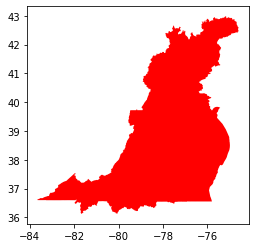

In [52]:
from shapely.ops import cascaded_union
from matplotlib import pyplot as plt

# get all polygons
allgeoms = ches_gdf.geometry.tolist()
ches_boundary = gpd.GeoSeries(cascaded_union(allgeoms), crs=4326)
ches_boundary.plot(color = 'red')
plt.show()

In [53]:
ches_boundary.to_file(os.path.join(up(path_cur), 'data', 'sir2005-5073_shed_shape', 'cbshed_boundary.geojson'), driver='GeoJSON')